### Two Stream Instability
Simulated in quasi-2D with only one cell in y-axis.

The only difference between stable and unstable setup is the number density of electrons (in essence, the weights of macro-particles). The physical constants are redefined so that ε0 = 1 F/m, μ0 = 1 H/m, and c0 = 1 m/s. 

In [181]:
include("../ijulia.jl")

In [182]:
ov = pyimport("openpmd_viewer")
ts = ov.OpenPMDTimeSeries("/tmp/ts/hdf5")
nothing

In [183]:
rcParams = PyDict(matplotlib["rcParams"])
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = "Routed Gothic"
rcParams["font.size"] = 15
rcParams["axes.linewidth"] = 1
rcParams["scatter.marker"] = "o"
rcParams["xtick.direction"] = "in"
rcParams["ytick.direction"] = "in"
nothing

In [184]:
_, metadata = ts.get_field("phi")
Lx, Ly = metadata.ymax, metadata.xmax
dx, dy = metadata.dy, metadata.dx
xs, ys = metadata.y, metadata.x
nx, ny = length(xs), length(ys)
e  = ts.get_particle(["id"], "e-")
np = length(e[1])
nothing

In [185]:
pt = ov.ParticleTracker(ts, iteration=1, select=Dict("id"=>[0, np]),
    species="e-", preserve_particle_index=false)
it, np = length(ts.iterations), pt.N_selected;
px = zeros(it, np)
py = zeros(it, np)
vx = zeros(it, np)
vy = zeros(it, np)
Ex = zeros(it, ny, nx)
phi = zeros(it, ny, nx)
rho = zeros(it, ny, nx)
nHe = zeros(it, ny, nx)
ne  = zeros(it, ny, nx)
nothing

In [186]:
using ProgressMeter
@showprogress for i=1:it
    x, y, ux, uy = ts.get_particle( ["x", "y", "ux", "uy"],
        select=pt, iteration=ts.iterations[i], species="e-")
    px[i, :] = x[:]
    py[i, :] = y[:]
    vx[i, :] = ux[:]
    vy[i, :] = uy[:]
    Ex[i, :, :],= ts.get_field("E", iteration=ts.iterations[i], coord="x")
   phi[i, :, :],= ts.get_field("phi", iteration=ts.iterations[i])
   rho[i, :, :],= ts.get_field("rho", iteration=ts.iterations[i])
   nHe[i, :, :],= ts.get_field("nHe+", iteration=ts.iterations[i])
    ne[i, :, :],= ts.get_field("ne-", iteration=ts.iterations[i])
end

Progress: 100%|█████████████████████████████████████████| Time: 0:01:10


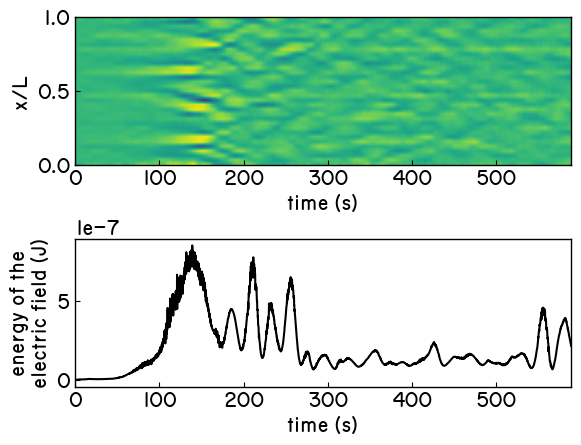

In [187]:
subplot(2,1,1)
ρ = rho[:,1,:]'
levels = range(minimum(ρ), maximum(ρ), length=128)
contourf(ts.t, xs/Lx, ρ, levels)
xlabel("time (s)")
ylabel("x/L")

subplot(2,1,2)
ε0 = 1.0
UE = 0.5ε0*dx*sum(Ex[:,1,:].^2; dims=2)
plot(ts.t, UE, "k")
xlabel("time (s)")
ylabel("energy of the\nelectric field (J)")
margins(x=0.0)
subplots_adjust(hspace=0.5)

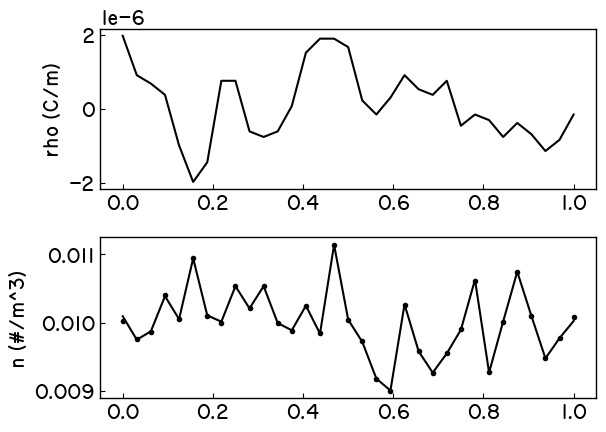

In [188]:
subplot(2,1,1); plot(xs/Lx,  Ex[1,1,:], "k-"); ylabel("rho (C/m)")
subplot(2,1,2); plot(xs/Lx,  ne[1,1,:], "k.",
                     xs/Lx, nHe[1,1,:], "k-"); ylabel("n (#/m^3)")
subplots_adjust(wspace=0.0, hspace=0.3)

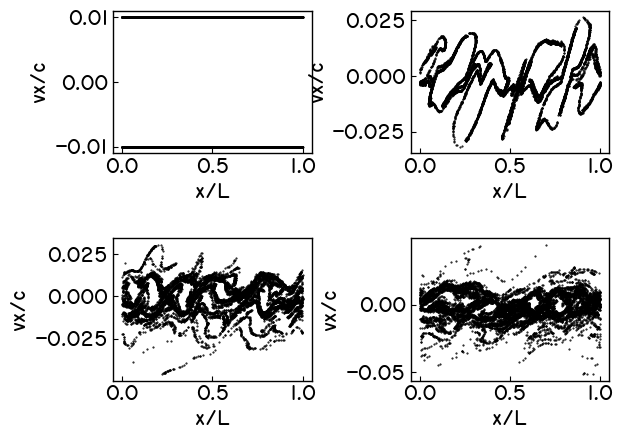

In [189]:
subplot(2,2,1); plot(px[  1,:]/Lx,  vx[   1,:]*3e8, "k.", markersize=1); xlabel("x/L"); ylabel("vx/c");# ylim(-5e-11, +5e-11); title("t=0 fs");
subplot(2,2,2); plot(px[1000,:]/Lx, vx[1000,:]*3e8, "k.", markersize=1); xlabel("x/L"); ylabel("vx/c"); #ylim(-5e-11, +5e-11); title("t=105 fs");
subplot(2,2,3); plot(px[2000,:]/Lx, vx[2000,:]*3e8, "k.", markersize=1); xlabel("x/L"); ylabel("vx/c");# ylim(-5e-11, +5e-11); title("t=264 fs");
subplot(2,2,4); plot(px[3000,:]/Lx, vx[3000,:]*3e8, "k.", markersize=1); xlabel("x/L"); ylabel("vx/c");# ylim(-5e-11, +5e-11); title("t=423 fs");
subplots_adjust(wspace=0.5, hspace=0.6)

In [192]:
p = ProgressUnknown("Rendering frames: ")
function phaseplot(i)
    cla()
    plot(px[i,:]/Lx, vx[i,:]*3e8, "k.", markersize=1)
    xlabel("x/L"); ylabel("vx/c");
    title("Iteration $i")
    next!(p)
end
animate(phaseplot, 1:6:it, (5, 2))
finish!(p)

Rendering frames:  501 	 Time: 0:00:28

<video controls src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAeCUBtZGF0AAACrgYF//+q3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE1NSByMjkxNyAwYTg0ZDk4IC0gSC4yNjQvTVBFRy00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAxOCAtIGh0dHA6Ly93d3cudmlkZW9sYW4ub3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFseXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVkX3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBkZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTYgbG9va2FoZWFkX3RocmVhZHM9MSBzbGljZWRfdGhyZWFkcz0wIG5yPTAgZGVjaW1hdGU9MSBpbnRlcmxhY2VkPTAgYmx1cmF5X2NvbXBhdD0wIGNvbnN0cmFpbmVkX2ludHJhPTAgYmZyYW1lcz0zIGJfcHlyYW1pZD0yIGJfYWRhcHQ9MSBiX2JpYXM9MCBkaXJlY3Q9MSB3ZWlnaHRiPTEgb3Blbl9nb3A9MCB3ZWlnaHRwPTIga2V5aW50PTI1MCBrZXlpbnRfbWluPTI1IHNjZW5lY3V0PTQwIGludHJhX3JlZnJlc2g9MCByY19sb29rYWhlYWQ9NDAgcmM9Y3JmIG1idHJlZT0xIGNyZj0yMy4wIHFjb21wPTAuNjAgcXBtaW49MCBxcG1heD02OSBxcHN0ZXA9NCBpcF9yYXRpbz0xLjQwIGFxPTE6MS4wMACAAAAO0GWIhAAv//72rvzLK0cLl7AZf4H+6u4ZbllHC9yp2bTza1NaRq/rCcObBmJWegx7Cm/q9YCyYerxXQRSBgxRmqE9E9UY5bvTuK/3bSIbuVmxUL0ikv7ktaFzLqPzJqJan4uiRYXj7cKeqOLAt++pqyymVaebb0N1PSsucAZd9Z/QyAC/S8u2g4vxFy9fhMydvZ5agWYBQF9EZGCNW7U/NLWVBxoNwz1rmksdzM0xKJrN38dYM1o1rJ3TockBhZwXspffcE7r3P7XODelpiMaKRL3gyp9ioqngx1Sc/WR6HoLGp6/PHwUCxdq3P7JQ66dTDrvyJYgk8rE4nRO55EtNR6z0lPO2YH7D0GbWskt3TlxXLPlSVOpQ4IWAujA1lIrSdRq+eKv/h4XYJPzlvbi+LzqGDy5BYZYUDfPktSxR/9A53inC32Q8u6bCXrtREtP+0Mkk03HGvJGEBVnP9GashYMtga2JgAuTHb6qTIG0TLz5uChBM/UCVRShO3Pvt+HKLOk0JqW0/0FxYYBksKCDSoZpfl5iFmBpc551XgpRIC3eYlLEtNHAMpUNAyjpCSlodGmRxvH7oLqFJB+8xdpuDm3CXcnDaFBtP8NyatIc6EspX/TcBDeau0CFF9p+CpSQAAC4O3eN+mXVxB4hQ/5DqxPKDfo7avTDpreNQGHv+uOTqre5AjvQAKDsGzh+P7fAlPLzc/hS8MY2F+dDvRKC5cSxWECvKShfIm9QSLHHQpDjY4WfUaBSt8db6nyUav66GAJSNw+IHP0kHjTc8y7Ifoxv7T5ysLKEpYqfl2GgTU+CGhd//UHN7UpGQ5tH7qKJU1xFwLhqv161vEdpXSO0E/ffLR3X5M3GpqBswurZS3yV0A+3bcGdirtPCZB25S6uqYwoFaJHnxYuR9DLRhvHdANS/woSJie930c4bHwO3JAKUS293LvIYZpYDHWEUax1Gdq1Q2wVhagUEz6B2pDNSNsOuOUH4WovEYRUDZjyyPlKokiF0f4wXtOjQC4mo2mQp519rlKB+MIo1pS0TbD+RwaFJk1GuQWee0SfKpWTlzSDeAlpjNcVA7mo2ZkuDV0MbtroEWh4Tg0rDjJ4HdQUsyTX7kJVO4tBcxjHziu6H/1bxLyfizLovjYXI/hXLvuO8dFATxoVrtsafkC+0+rCokKGD9OiQTVDzivPQdq4CmCCx5eDJkTkKGfVH/WG2+szRl/oJOz6lbo4B0Aav70mMoHYL/ZN5JuR8zj2YL14AVA2MNwBmOVDcAd59vOl50hhMhK1BHeHlAAAAMABUCYKR4S96JX+epDtXnUYFemBxjfB+zQAAAHszpjkzapNt6Fm52UQBnBMe/bBwGwT51HYPOFDHMWvQOS3qb8t2DUZQQxOR7FgH32q17uKJ+GbU7COy/znM4qxBh3Koyg85jGF22msGLsXoVr4KPmwZwKHSD2aEp/bN+inY2qPlj4vqK9fLXqfMq1BFCTBKfUMr0AaWJXZk0IYEHvQHQfV9bD0SW6PZ8MgebrZ7bn60L4bGC19g4e+5iCyEtlgEYsNN23ZiknFsaB0EmnPKiLDlwJAfeXxWCqey7c3hM4vJfIs/ly5pPOeRWrslqmCHgT3CglE6RLOBkx9q5Rf0OOgjiEZMU+X2uBANYkJVmCXKU7l/g3bhyAHeMi7fdp8NQHOVPkca3w0rwSGYS+7Ai0LLaKXQF9h/oPTTO0WBKl0kp9OqDnrRBM9PySWSIMjm66x1gb1JJf/Svqyinb7+RQGOWgBO8JTx4QqzIXmYYG7i9o33EjdFlzPB3TmC4GZEgNGqtGF0el88/TceFgU/P0VGpqW2sTJU+kjd/QxTFr2oRSDYq0l7yc0S0APD5BZpxmSkD8MQXcGnsq+nqMmoGUueNcTEhcLIxMMdLZNNYf90CQPqSW8H5gbcPJHJbPZwraLZ4T4xzHcsnXnUECHiq7p90lqeTkHT3Sw8kmXnHp4moWMPNLe2iT4eK30mxEWeOtKz4RFD/s/jHYduRUG8T5QBNP/y8q7f1SplHG+qygVXJg1gyFZSs/hnqFM9m8VjPE/y1VTEBM4EMajilbcndK5wLmsv0ZtKt7BtoI/gcIgy5noo4SIjYY9p95ZlYFm1Sq593t8UKYWdkto6/tcj1jsxqgvchLz+l+N5FjZXggYQq1VGXJf0ABouJtvoCmhgAZg2qakWO2+m0/iC0HNuKClNrCs8GLsJ8TKDWjxZL1irOeLlbhMbX3kKBCxDN8owqeaDg9JUJb/v3weZiBwOBh065oDyCaOWOrBWvdk2BBtgW////sNX4ewAbCPCzZUv0LPDV5TzFOLmZ+6+GF/OzDbeWY7PaZimtWsWKxnU+IORBVTBwzw+1AvSk0iZPuFdi4RIE00uLkjgWUx5J11u6SFb265q6ur9j8qCFAali4QK+7B7EBNZfgWCgcHDoy00h0Anvi08ZXOnr9h2D9V8IdrGRz8SKh9qaw9/ch0Nw87hRPZcYjxPOoDY25ykCHXdN9BIrEc0MK09huErL2qJrDMUZFCDxfeXTP5PGtZvNwLc8yaqvtHOXRxAuDGZPWS0x1NjowU5Guuyvc8zimO6W2bDw3C2lRYTDregyKszzDkV2kMEnwKNxHYbO7XF7tnzD9xXs0Dr5gxFKv3HvHKQ52kaUvG9RWuN3ceiGjiPxULFahNdVRh4GRZAeJPeUC+xzh2lfNT3Ek3wCYN/BLd8hOnCyiJYLLaIrgnOMqqyIhGHzWACZd/2Z69riqmeXDedXBl0y0oeQ2zDcp1h9stb3wNu1Gr1O7QEvKh3tGm/w1RXjc6Do3a3wCFLyy210HIyZr7KzDiDg1GZJFbD5yk5YWQNuKz9D6FZtNqVlyqNgzRYJX9S8rW5ks6asyExcWWrn1qckvq5rn+Pqa8LAEtjUql3e39Tb0M8w6B/HPHzDp1Adzpk4Bsp7JcC3fu90TX0Cqf59qgt1

Rendering frames:  501 	 Time: 0:00:28


### Solve problem

In [1]:
PROBLEM = "ts_unstable.jl"
include("../src/iskra.jl")

┌ Warning: ProgressMeter by default refresh meters with additional information in IJulia via `IJulia.clear_output`, which clears all outputs in the cell. 
│  - To prevent this behaviour, do `ProgressMeter.ijulia_behavior(:append)`. 
│  - To disable this warning message, do `ProgressMeter.ijulia_behavior(:clear)`.
└ @ ProgressMeter /Users/bach/.julia/packages/ProgressMeter/0ub8y/src/ProgressMeter.jl:474
Progress: 100%|█████████████████████████████████████████| Time: 0:00:30
  iteration:  1000
  e:          1280


Exporting to XDMF...
Complete!
 29.872480 seconds (271.79 M allocations: 14.208 GiB, 8.25% gc time)
